In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Simulate dataset

In [2]:
np.random.seed(42)


# (1000, 2) samples from X-U(0, 1)
X = np.random.uniform(0, 1, (1000, 2)) #high, low, samples, features

# 1000 samples E-N(0, 1)
epsilon = np.random.normal(0, 1, size=1000)

# Picking out specific columns from numpy array
X_col1 = X[:, 0]
X_col2 = X[:, 1]

# y-value
y = 3*X_col1 + 5*X_col2 + 3 + epsilon # beta1, beta2, beta3...?
y = y.reshape(-1, 1) # needs to be (1000, 1) in order for shapes to line up correctly in GD function



### Concatinating intercept column for X

In [3]:
intercept = np.ones(len(X)) # create array with ones the length of X
X_1 = np.c_[intercept, X] # concats intercept array with X array
X_1

array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       ...,
       [1.        , 0.75137509, 0.65695516],
       [1.        , 0.95661462, 0.06895802],
       [1.        , 0.05705472, 0.28218707]])

# 1. Gradient descent - learning rate

In [4]:
learning_rate_01 = 0.1
iterations_500 = 500

def gradient_descent(X, y, learning_rate, iterations):
    m = len(X)

    theta = np.random.randn(X.shape[1], 1)

    for _ in range(iterations):
        gradient = 2/m*X.T@(X@theta-y)
        theta -= learning_rate*gradient

    return theta

# A

In [11]:
steps = range(1, 500, 5) # jumping 5 steps per iteration
thetas = [gradient_descent(X_1, y, learning_rate_01, iterations=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

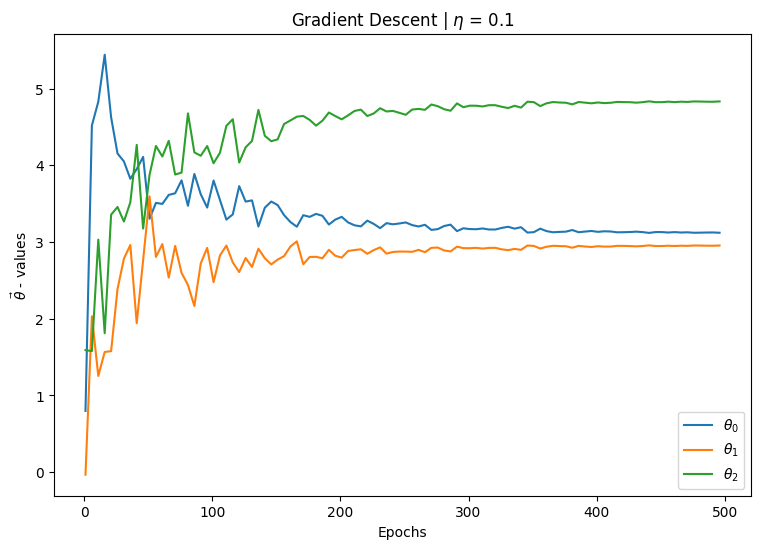

In [12]:
plt.figure(figsize=(9,6))
plt.plot(steps, thetas)
plt.title(r"Gradient Descent | ${\eta}$ = 0.1")
plt.ylabel(r"$\vec{\theta}$ - values")
plt.xlabel("Epochs")
plt.gca().legend((r"${\theta_0}$", r"${\theta_1}$", r"${\theta_2}$")); # legend titlar

# B

In [7]:
learning_rate_001 = 0.01
steps = range(1, 5000, 5) # jumping 5 steps per iteration
thetas = [gradient_descent(X_1, y, learning_rate_001, iterations=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

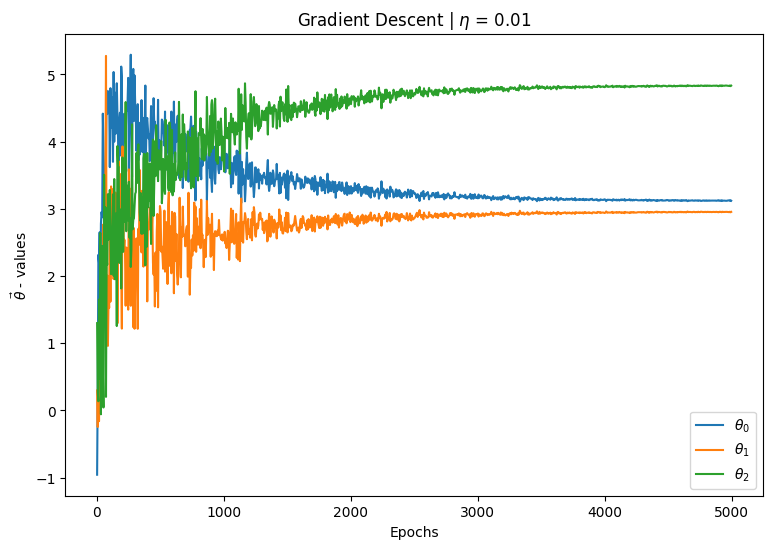

In [8]:
plt.figure(figsize=(9,6))
plt.plot(steps, thetas)
plt.title(r"Gradient Descent | ${\eta}$ = 0.01")
plt.ylabel(r"$\vec{\theta}$ - values")
plt.xlabel("Epochs")
plt.gca().legend((r"${\theta_0}$", r"${\theta_1}$", r"${\theta_2}$")); # legend titlar

# C

- Balansen måste vara relativ till både antal epoker och learning rate.
- om learning rate är för "lågt" gentemot epoker så blir det bara "squigly lines" som blir bredare och bredare ju lägre learning rate är
- om learning rate är för högt relativt till epokerna så blir det mindre "squigly lines" och rakt streck snabbare
- Vad betyder det här exakt? behöver fråga Kokchun eller kolla upp

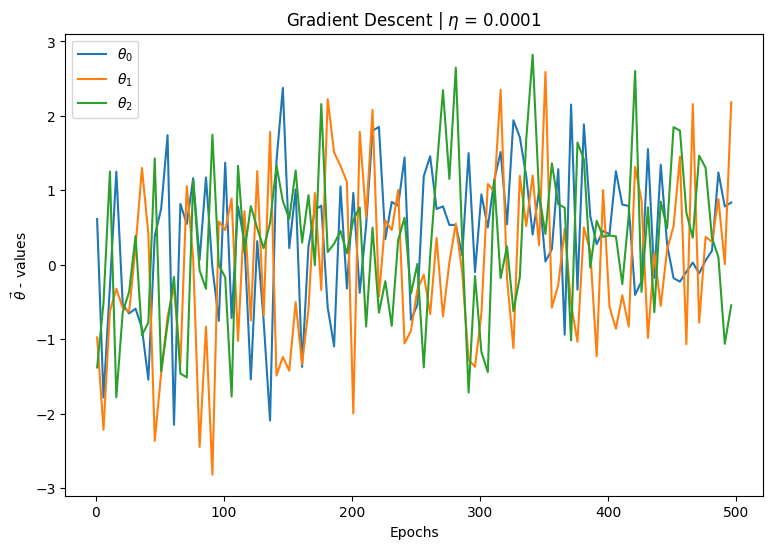

In [9]:
learning_rate_001 = 0.0001
steps = range(1, 500, 5) # jumping 5 steps per iteration
thetas = [gradient_descent(X_1, y, learning_rate_001, iterations=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

plt.figure(figsize=(9,6))
plt.plot(steps, thetas)
plt.title(r"Gradient Descent | ${\eta}$ = "f"{learning_rate_001}")
plt.ylabel(r"$\vec{\theta}$ - values")
plt.xlabel("Epochs")
plt.gca().legend((r"${\theta_0}$", r"${\theta_1}$", r"${\theta_2}$")); # legend titlar

# 2. Stochastic Gradient Descent - learning rate